In [ ]:
!pip install kaggle

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from google.colab import files
import numpy as np
import math
import tensorflow_hub as hub

tf.random.set_seed(123)

In [2]:
from keras.datasets import cifar10

batch_size = 64
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def batch_gen(xs, ys, batch_size):
  slices = [slice(batch_size*i, batch_size*i+batch_size) for i in range(xs.shape[0] // batch_size)]
  for s in slices:
    yield (xs[s] / 255, tf.one_hot(ys[s], 10))

def train_gen():
  for img, label in batch_gen(x_train, y_train, batch_size):
    yield (tf.image.resize(img, (224, 224)), tf.reshape(label, (batch_size, 10)))

def test_gen():
  for img, label in batch_gen(x_test, y_test, batch_size):
    yield (tf.image.resize(img, (224, 224)), tf.reshape(label, (batch_size, 10)))

dataset = tf.data.Dataset.from_generator(train_gen, output_signature=(tf.TensorSpec(shape=(batch_size, 224,224,3), dtype=tf.float32), tf.TensorSpec(shape=(batch_size, 10), dtype=tf.int32)))
test_db = tf.data.Dataset.from_generator(test_gen, output_signature=(tf.TensorSpec(shape=(batch_size, 224,224,3), dtype=tf.float32), tf.TensorSpec(shape=(batch_size, 10), dtype=tf.int32)))

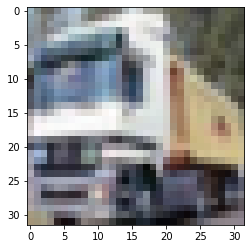

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

from matplotlib import pyplot as plt
plt.imshow(x_train[1], interpolation='nearest')
plt.show()

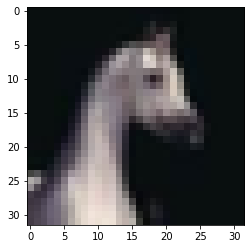

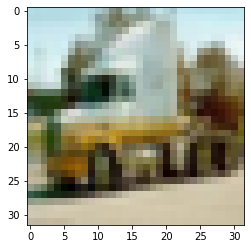

In [ ]:
import random

datagen7 = ImageDataGenerator()

datagen8 = ImageDataGenerator()

random.seed(44)
iterator7 = datagen7.flow(x = x_train/255,y = tf.one_hot(y_train,10), batch_size = 64, shuffle=True)
iterator8 = datagen8.flow(x = x_train/255,y = tf.one_hot(y_train,10), batch_size = 64, shuffle=True)

img7_details = next(iterator7)
img7 = img7_details[0][6]
img7_label = img7_details[1][6]

img8_details = next(iterator8)
img8 = img8_details[0][6]
img8_label = img8_details[1][6]

plt.imshow(img7, interpolation='nearest')
plt.show()

plt.imshow(img8, interpolation='nearest')
plt.show()




In [ ]:
img7_label

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
img8_label

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
beta_random = np.random.beta(0.5, 0.5, size=1)[0]
beta_random

0.4682865953949337

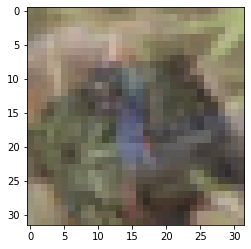

In [42]:
img_augmented = img7*beta_random + img8*(1 - beta_random)

plt.imshow(img_augmented, interpolation='nearest')
plt.show()

In [ ]:
label_augmented = img7_label*beta_random + img8_label*(1 - beta_random)
label_augmented

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.4682866, 0.       , 0.5317134]], dtype=float32)

In [4]:
betas = np.random.beta(0.5,0.5, 49984)

x_augmented = x_train[0:49984,:,:,:]
y_augmented = y_train[0:49984,0]

for i in range(0,49983):
  x_augmented[i,:,:,:] = x_augmented[i,:,:,:] * betas[i] + x_augmented[i+1,:,:,:] *(1 - betas[i])
  # 
  #if (y_augmented[i+1] >= y_augmented[i]):
  #  y_augmented[i] = y_augmented[i+1]
  y_augmented[i] = y_augmented[i] * betas[i] + y_augmented[i+1] * (1 - betas[i])


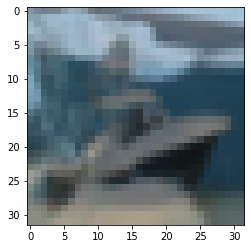

In [44]:
plt.imshow(x_augmented[7,:,:,:], interpolation='nearest')
plt.show()

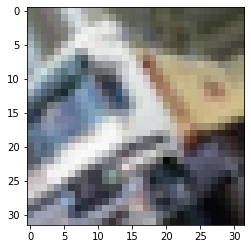

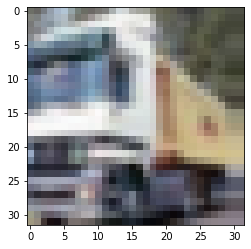

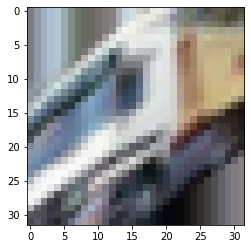

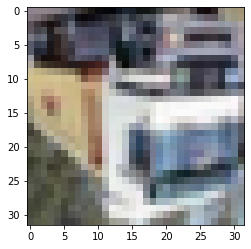

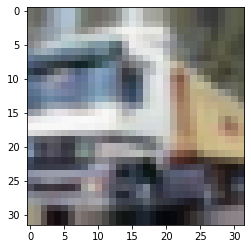

In [5]:
datagen0 = ImageDataGenerator()

datagen1 = ImageDataGenerator(
    rotation_range=30)

datagen2 = ImageDataGenerator(
    width_shift_range=0.3)

datagen3 = ImageDataGenerator(
    shear_range= 40)

datagen4 = ImageDataGenerator( # vertical/horizontal flips
    horizontal_flip = True, vertical_flip = True)

datagen5 = ImageDataGenerator( # zooming in/out by 20%
    zoom_range= [0.7, 1.3])

datagen6 = ImageDataGenerator(
    width_shift_range=0.1)






labels = tf.one_hot(y_train[0:49984,0], 10)
labels = tf.reshape(labels, (49984,10))

labels_augmented = tf.one_hot(y_augmented, 10)
labels_augmented = tf.reshape(labels_augmented, (49984,10))


iterator0 = datagen0.flow(x = x_train[0:49984,:,:,:]/255,y = labels, batch_size = 64, shuffle=False)
iterator1 = datagen1.flow(x = x_train[0:49984,:,:,:]/255,y = labels, batch_size = 64, shuffle=False)
iterator2 = datagen2.flow(x = x_train[0:49984,:,:,:]/255,y = labels, batch_size = 64, shuffle=False)
iterator3 = datagen3.flow(x = x_train[0:49984,:,:,:]/255,y = labels, batch_size = 64, shuffle=False)
iterator4 = datagen4.flow(x = x_train[0:49984,:,:,:]/255,y = labels, batch_size = 64, shuffle=False)
iterator5 = datagen5.flow(x = x_train[0:49984,:,:,:]/255,y = labels, batch_size = 64, shuffle=False)
iterator6 = datagen6.flow(x = x_augmented/255,y = labels_augmented, batch_size = 64, shuffle=False)

img = next(iterator1)[0][1]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator2)[0][1]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator3)[0][1]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator4)[0][1]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator5)[0][1]
plt.imshow(img, interpolation='nearest')
plt.show()


In [16]:
# Model for data augmentation techniques comparison

model = tf.keras.models.Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(224),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())
model.summary()




Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 32, 32, 3)         0         
                                                                 
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_20 (Dense)            (None, 32)                98336     
                                                                 
 dense_21 (Dense)            (None, 224)               7392      
                                                                 
 dense_22 (Dense)            (None, 64)                14400     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 10)               

In [ ]:
img = next(iterator4)[0]

img.shape

(64, 32, 32, 3)

In [11]:
def gen0():
  for i in iterator0:
    yield i
def gen1():
  for i in iterator1:
    yield i
def gen2():
  for i in iterator2:
    yield i
def gen3():
  for i in iterator3:
    yield i
def gen4():
  for i in iterator4:
    yield i
def gen5():
  for i in iterator5:
    yield i
def gen6():
  for i in iterator6:
    yield i

In [12]:
# dataset & test_db creation from generators
iter_0_db = tf.data.Dataset.from_generator(gen0, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_1_db = tf.data.Dataset.from_generator(gen1, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_2_db = tf.data.Dataset.from_generator(gen2, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_3_db = tf.data.Dataset.from_generator(gen3, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_4_db = tf.data.Dataset.from_generator(gen4, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_5_db = tf.data.Dataset.from_generator(gen5, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_6_db = tf.data.Dataset.from_generator(gen6, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.float32)))



# Fitting models

In [9]:
# print(gen1().__next__())
model.fit(iter_0_db, epochs=1)
model.evaluate(test_db)

  20142/Unknown - 97s 5ms/step - loss: 2.0452 - accuracy: 0.2257

KeyboardInterrupt: ignored

In [12]:
model = tf.keras.models.Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(224),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.fit(iter_1_db, epochs=1)
model.evaluate(test_db)

  20120/Unknown - 521s 26ms/step - loss: 2.0612 - accuracy: 0.2184

KeyboardInterrupt: ignored

In [8]:
model = tf.keras.models.Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(224),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.fit(iter_2_db, epochs=1)
model.evaluate(test_db)

  20429/Unknown - 550s 27ms/step - loss: 2.0730 - accuracy: 0.2091

KeyboardInterrupt: ignored

In [13]:
model = tf.keras.models.Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(224),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.fit(iter_3_db, epochs=1)
model.evaluate(test_db)

  20142/Unknown - 498s 25ms/step - loss: 2.0671 - accuracy: 0.2137

KeyboardInterrupt: ignored

In [15]:
model = tf.keras.models.Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(224),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.fit(iter_4_db, epochs=1)
model.evaluate(test_db)

  20251/Unknown - 102s 5ms/step - loss: 2.1076 - accuracy: 0.1977

KeyboardInterrupt: ignored

In [16]:
model = tf.keras.models.Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(224),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.fit(iter_5_db, epochs=1)
model.evaluate(test_db)

  20199/Unknown - 498s 25ms/step - loss: 2.0658 - accuracy: 0.2151

KeyboardInterrupt: ignored

In [17]:
model = tf.keras.models.Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(224),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.fit(iter_6_db, epochs=1)
model.evaluate(test_db)


  20204/Unknown - 508s 25ms/step - loss: 2.0580 - accuracy: 0.2186

KeyboardInterrupt: ignored